In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv("diabetes_data_upload.csv")
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
diabetes.shape

(520, 17)

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
for column in diabetes:
    print(column)

Age
Gender
Polyuria
Polydipsia
sudden weight loss
weakness
Polyphagia
Genital thrush
visual blurring
Itching
Irritability
delayed healing
partial paresis
muscle stiffness
Alopecia
Obesity
class


In [6]:
for column in diabetes:
    print(f"{column}: ", diabetes[column].unique())

Age:  [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Gender:  ['Male' 'Female']
Polyuria:  ['No' 'Yes']
Polydipsia:  ['Yes' 'No']
sudden weight loss:  ['No' 'Yes']
weakness:  ['Yes' 'No']
Polyphagia:  ['No' 'Yes']
Genital thrush:  ['No' 'Yes']
visual blurring:  ['No' 'Yes']
Itching:  ['Yes' 'No']
Irritability:  ['No' 'Yes']
delayed healing:  ['Yes' 'No']
partial paresis:  ['No' 'Yes']
muscle stiffness:  ['Yes' 'No']
Alopecia:  ['Yes' 'No']
Obesity:  ['Yes' 'No']
class:  ['Positive' 'Negative']


In [7]:
# define a dictionary mapping values to corresponding numbers
replacement_dict = {"Male": 1, "Female": 0, "Yes": 1, "No": 0, "Positive": 1, "Negative": 0}

# get the categorical columns
columns_to_replace = diabetes.select_dtypes(include='object').columns

# replace the categorical values with their corresponding numbers
diabetes[columns_to_replace] = diabetes[columns_to_replace].replace(replacement_dict)

# check the updated data
diabetes.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_18068\1144502464.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes[columns_to_replace] = diabetes[columns_to_replace].replace(replacement_dict)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


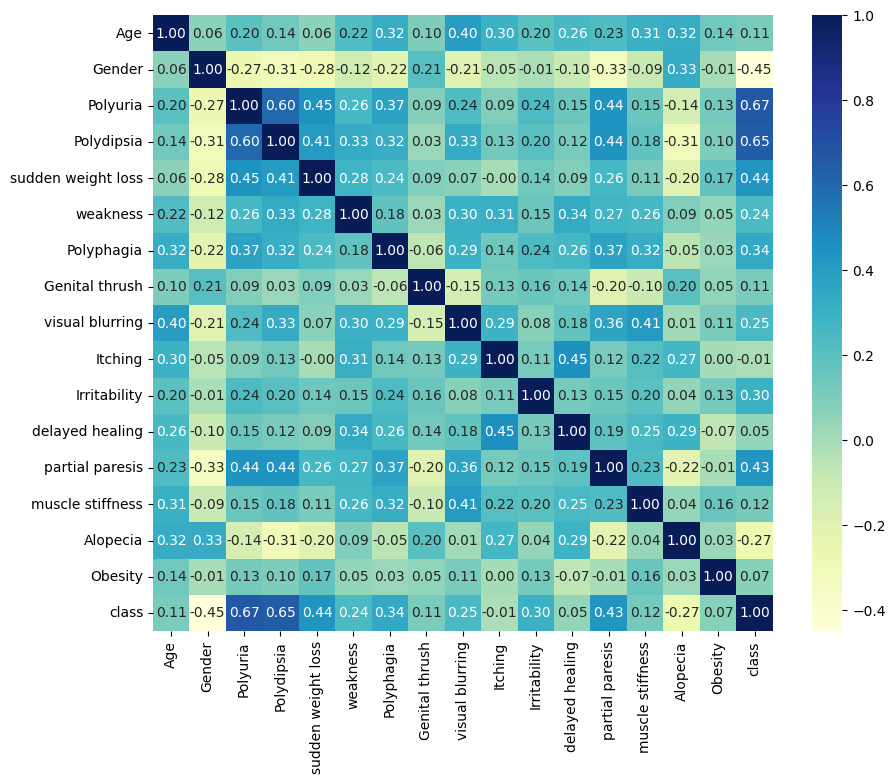

In [8]:
plt.figure(figsize=(10, 8))
matrix = diabetes.corr(numeric_only=True)
dataplot = sns.heatmap(matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

To train the model, 4 columns are selected together with the class column to make it 5 n total. They are chosen because they have a correlation of > 0.4 with the class column. They are Polyuria, Polydipsia, sudden weight loss and partial paresis.

Before choosing the columns, we'll subset the dataframe to have an equal number of positives and negatives

In [9]:
# subset the dataframe to have an equal number of negatives and positives

# separate the data into two dataframes, one for class 0 and one for class 1

class_1 = diabetes[diabetes["class"] == 1]
class_0 = diabetes[diabetes["class"] == 0]

# determine the size of the smaller dataframe

min_size = min(len(class_1), len(class_0))

# randomly select the same number of rows from the larger dataframe

if len(class_1) > len(class_0):
    class_1_subset = class_1.sample(n=min_size, random_state=42)
    class_0_subset = class_0
else:
    class_0_subset = class_0.sample(n=min_size, random_state=42)
    class_1_subset = class_1

# concatenate the two dataframes to have equal positives and negatives
diabetes_subset = pd.concat([class_1_subset, class_0_subset])

# check the new dataframe
diabetes_subset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
167,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
302,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
25,32,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1
63,60,0,1,0,1,1,0,1,1,1,0,1,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [10]:
print("diabetes subset: ", diabetes_subset.shape)
print("class 1: ", class_1_subset.shape)
print("class 0: ", class_0_subset.shape)

diabetes subset:  (400, 17)
class 1:  (200, 17)
class 0:  (200, 17)


In [11]:
# filter the correlation matrix to include only the correlation values between the class column and the class column and other variables
class_corr = matrix['class']

# select the variables with correlation greater than 0.4
select_cols = class_corr[abs(class_corr) > 0.4].index.tolist()

# create a new dataframe with selected variables
model_train = diabetes_subset[select_cols]

# check the new dataframe
model_train.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,partial paresis,class
167,1,1,1,1,0,1
302,0,1,0,0,0,1
25,1,0,0,0,0,1
63,0,1,0,1,1,1
9,1,0,1,1,0,1


## Model Training

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into features (x) and target variable (y)

x = diabetes.drop('class', axis=1)
y = diabetes['class']

# split data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# create and train the decision tree classifier

clf = DecisionTreeClassifier()

# fit the decision tree classifier to the training data
clf.fit(x_train, y_train)

# make predictions on the test data

y_pred = clf.predict(x_test)

# calculate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

Accuracy: 0.971154


In [13]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Split the data into features (X) and the target variable (y)
# X = model_train.drop('class', axis=1)
# y = model_train['class']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a logistic regression classifier object
# clf = LogisticRegression()

# # Fit the logistic regression classifier to the training data
# clf.fit(X_train, y_train)

# # Predict the target variable for the testing data
# y_pred = clf.predict(X_test)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %f" % accuracy)

Due to an increase in the accuracy score, I will go with including all original features in training the model.

In [14]:
# import joblib

# joblib.dump(clf, "diabetes_decison_tree.pkl")